In [3]:
#!pip install kagglehub==0.4.1

In [4]:
import kagglehub
import os
import librosa
import pandas as pd
import numpy as np
import IPython.display as ip
import matplotlib.pyplot as plt

# Downloading RAVDESS data

In [5]:
# Download latest version
path = kagglehub.dataset_download("orvile/ravdess-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ravdess-dataset' dataset.
Path to dataset files: /kaggle/input/ravdess-dataset


In [6]:
#os.listdir(path)

In [7]:
sorted(os.listdir(path+'/Audio_Speech_Actors_01-24'))

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [8]:
#librosa.load(path+'/Video_Speech_Actor_15/Actor_15/01-01-02-02-02-01-15.mp4')

In [9]:
os.path.sep

'/'

# Parsing file names to create basic input data

In [ ]:

list_of_actors = sorted(os.listdir(path+'/Audio_Speech_Actors_01-24'))
audio_input_files = []
for actor in list_of_actors:
  actor_wav_list = os.listdir(path + os.path.sep + 'Audio_Speech_Actors_01-24' + os.path.sep + actor)
  for wav_filename in actor_wav_list:
    filename_parts = wav_filename[0:-4].split('-')
    file_info = []
    file_info.append(path + os.path.sep + 'Audio_Speech_Actors_01-24' + os.path.sep + actor + os.path.sep + wav_filename)
    if filename_parts[2] == '01':
      file_info.append('Neutral')
    elif filename_parts[2] == '02':
      file_info.append('Calm')
    elif filename_parts[2] == '03':
      file_info.append('Happy')
    elif filename_parts[2] == '04':
      file_info.append('Sad')
    elif filename_parts[2] == '05':
      file_info.append('Angry')
    elif filename_parts[2] == '06':
      file_info.append('Fearful')
    elif filename_parts[2] == '07':
      file_info.append('Disgust')
    elif filename_parts[2] == '08':
      file_info.append('Surprised')
    else:
      file_info.append('Unknown')

    if filename_parts[3] == '01':
      file_info.append('Normal')
    elif filename_parts[3] == '02':
      file_info.append('Strong')
    else:
      file_info.append('Unknown')

    if filename_parts[4] == '01':
      file_info.append('Kids')
    elif filename_parts[4] == '02':
      file_info.append('Dogs')
    else:
      file_info.append('Unknown')

    if filename_parts[5] == '01':
      file_info.append(1)
    elif filename_parts[5] == '02':
      file_info.append(2)
    else:
      file_info.append('Unknown')

    if int(filename_parts[-1])%2 == 0:
      file_info.append("F")
    else:
      file_info.append("M")

    audio_input_files.append(tuple(file_info))

audio_input_files_columns = ['filename','emotion','intensity','sentence','repetition','gender']
print(audio_input_files)

**Filename identifiers **

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [11]:
audio_input_df = pd.DataFrame.from_records(audio_input_files , columns = audio_input_files_columns)

In [12]:
audio_input_df

,filename,emotion,intensity,sentence,repetition,gender
0,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Calm,Normal,Dogs,2,M
1,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Neutral,Normal,Kids,2,M
2,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Sad,Strong,Kids,2,M
3,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Calm,Strong,Dogs,1,M
4,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Calm,Normal,Dogs,1,M
...,...,...,...,...,...,...
1435,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Happy,Strong,Kids,1,F
1436,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Happy,Strong,Dogs,2,F
1437,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Calm,Normal,Kids,1,F
1438,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Surprised,Normal,Kids,1,F


In [13]:
audio_input_df.sample(10)

,filename,emotion,intensity,sentence,repetition,gender
17,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Angry,Strong,Kids,2,M
1210,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Disgust,Normal,Kids,1,M
1246,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Neutral,Normal,Dogs,2,M
630,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Angry,Normal,Kids,2,M
404,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Disgust,Normal,Kids,2,M
205,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Happy,Strong,Dogs,2,F
420,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Calm,Strong,Kids,2,F
1175,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Fearful,Normal,Dogs,2,F
714,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Surprised,Strong,Kids,1,F
491,/kaggle/input/ravdess-dataset/Audio_Speech_Act...,Sad,Normal,Kids,2,M


In [14]:
audio_input_df.emotion.unique()

array(['Calm', 'Neutral', 'Sad', 'Fearful', 'Happy', 'Disgust', 'Angry',
       'Surprised'], dtype=object)

In [15]:
#type(y)

In [16]:
#y.shape

# Librosa docs

**From librosa docs**
```
>>> y, sr = librosa.load(librosa.ex('trumpet'))
>>> librosa.feature.melspectrogram(y=y, sr=sr)

array([[3.837e-06, 1.451e-06, ..., 8.352e-14, 1.296e-11],
       [2.213e-05, 7.866e-06, ..., 8.532e-14, 1.329e-11],
       ...,
       [1.115e-05, 5.192e-06, ..., 3.675e-08, 2.470e-08],
       [6.473e-07, 4.402e-07, ..., 1.794e-08, 2.908e-08]],
      dtype=float32)

Using a pre-computed power spectrogram would give the same result:

>>> D = np.abs(librosa.stft(y))**2

>>> S = librosa.feature.melspectrogram(S=D, sr=sr)

Display of mel-frequency spectrogram coefficients, with custom
arguments for mel filterbank construction (default is fmax=sr/2):

>>> # Passing through arguments to the Mel filters

>>> S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
...                                     fmax=8000)

>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> S_dB = librosa.power_to_db(S, ref=np.max)
>>> img = librosa.display.specshow(S_dB, x_axis='time',
...                          y_axis='mel', sr=sr,
...                          fmax=8000, ax=ax)
>>> fig.colorbar(img, ax=ax, format='%+2.0f dB')
>>> ax.set(title='Mel-frequency spectrogram')
```

# compute_mel() : Returns mel spectrograms of audio file

In [17]:
def compute_mel(audio_wav_filename, return_sr=False):
  y, sr = librosa.load(audio_wav_filename)
  mel = librosa.feature.melspectrogram(
    y = y, sr = sr, n_mels = 40, fmax= min(8000, sr/2)
  )
  mel_db = librosa.power_to_db(mel, ref=np.max)
  if not return_sr:
    return mel_db
  else:
    return mel_db, sr

# Visualising mel spectrograms

In [18]:
def plot_mel_spectrogram(mel_spectrogram, sr):
  fig, ax = plt.subplots()
  img = librosa.display.specshow(
          mel_spectrogram,
          x_axis='time',
          y_axis='mel',
          sr=sr,
          fmax = min(8000 , sr/2),
          ax=ax
      )
  fig.colorbar(
      img,
      ax=ax,
      format='%+2.0f dB'
  )
  return ax.set(title='Mel-frequency spectrogram')

def plot_audiofile(audio_sample_file):
  mel_spectrogram_db, sr = compute_mel(audio_sample_file, return_sr=True)
  #print(mel_spectrogram_db.shape)
  return plot_mel_spectrogram(
          mel_spectrogram_db,
          sr
        )

def plot_audio_sample(emotion, intensity):
  sample_row = audio_input_df[(audio_input_df.emotion == emotion) & (audio_input_df.intensity == intensity)].sample(1)
  #print(sample_row)
  audio_emotion_sample_file = sample_row['filename'].values[0]
  plot_audiofile(audio_emotion_sample_file)
  return

#ip.Audio(audio_emotion_sample_file)

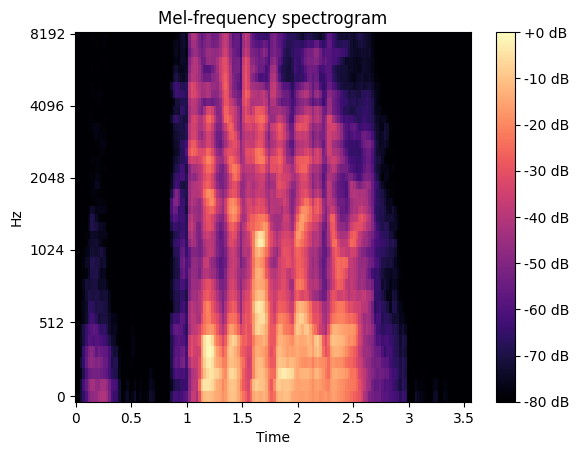

In [19]:
plot_audio_sample("Sad","Normal")

In [20]:
def plot_mel_spectrograms(spectrogram_list, sr=22050, n_cols=2):

  n = len(spectrogram_list)
  n_rows = int(np.ceil(n / n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
  axes = np.array(axes).reshape(-1)  # flatten safely

  for i, mel_db in enumerate(spectrogram_list):
    img = librosa.display.specshow(
              mel_db,
              x_axis="time",
              y_axis="mel",
              sr=sr,
              fmax=min(8000, sr/2),
              ax=axes[i]
          )
    axes[i].set_title(f"Plot #{i+1}")
    fig.colorbar(img, ax=axes[i], format="%+2.0f dB")

  # Hide unused subplots
  for j in range(i + 1, len(axes)):
    axes[j].axis("off")
  plt.tight_layout()

  return

In [21]:
def plot_audio_samples(emotions, n_cols=3):
    n = len(emotions)
    n_rows = int(np.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = np.array(axes).reshape(-1)  # flatten safely

    for i, emotion in enumerate(emotions):
        sample_row = audio_input_df[audio_input_df.emotion == emotion].sample(1)
        audio_file = sample_row['filename'].values[0]

        y, sr = librosa.load(audio_file)

        fmax = min(8000, sr/2)
        mel = librosa.feature.melspectrogram(
            y=y, sr=sr, n_mels=40, fmax=fmax
        )
        mel_db = librosa.power_to_db(mel, ref=np.max)

        img = librosa.display.specshow(
            mel_db,
            x_axis="time",
            y_axis="mel",
            sr=sr,
            fmax=fmax,
            ax=axes[i]
        )
        axes[i].set_title(f"Emotion: {emotion}")
        fig.colorbar(img, ax=axes[i], format="%+2.0f dB")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    return fig, axes

(<Figure size 1000x1600 with 16 Axes>,
 array([<Axes: title={'center': 'Emotion: Calm'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Neutral'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Sad'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Fearful'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Happy'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Disgust'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Angry'}, xlabel='Time', ylabel='Hz'>,
        <Axes: title={'center': 'Emotion: Surprised'}, xlabel='Time', ylabel='Hz'>],
       dtype=object))

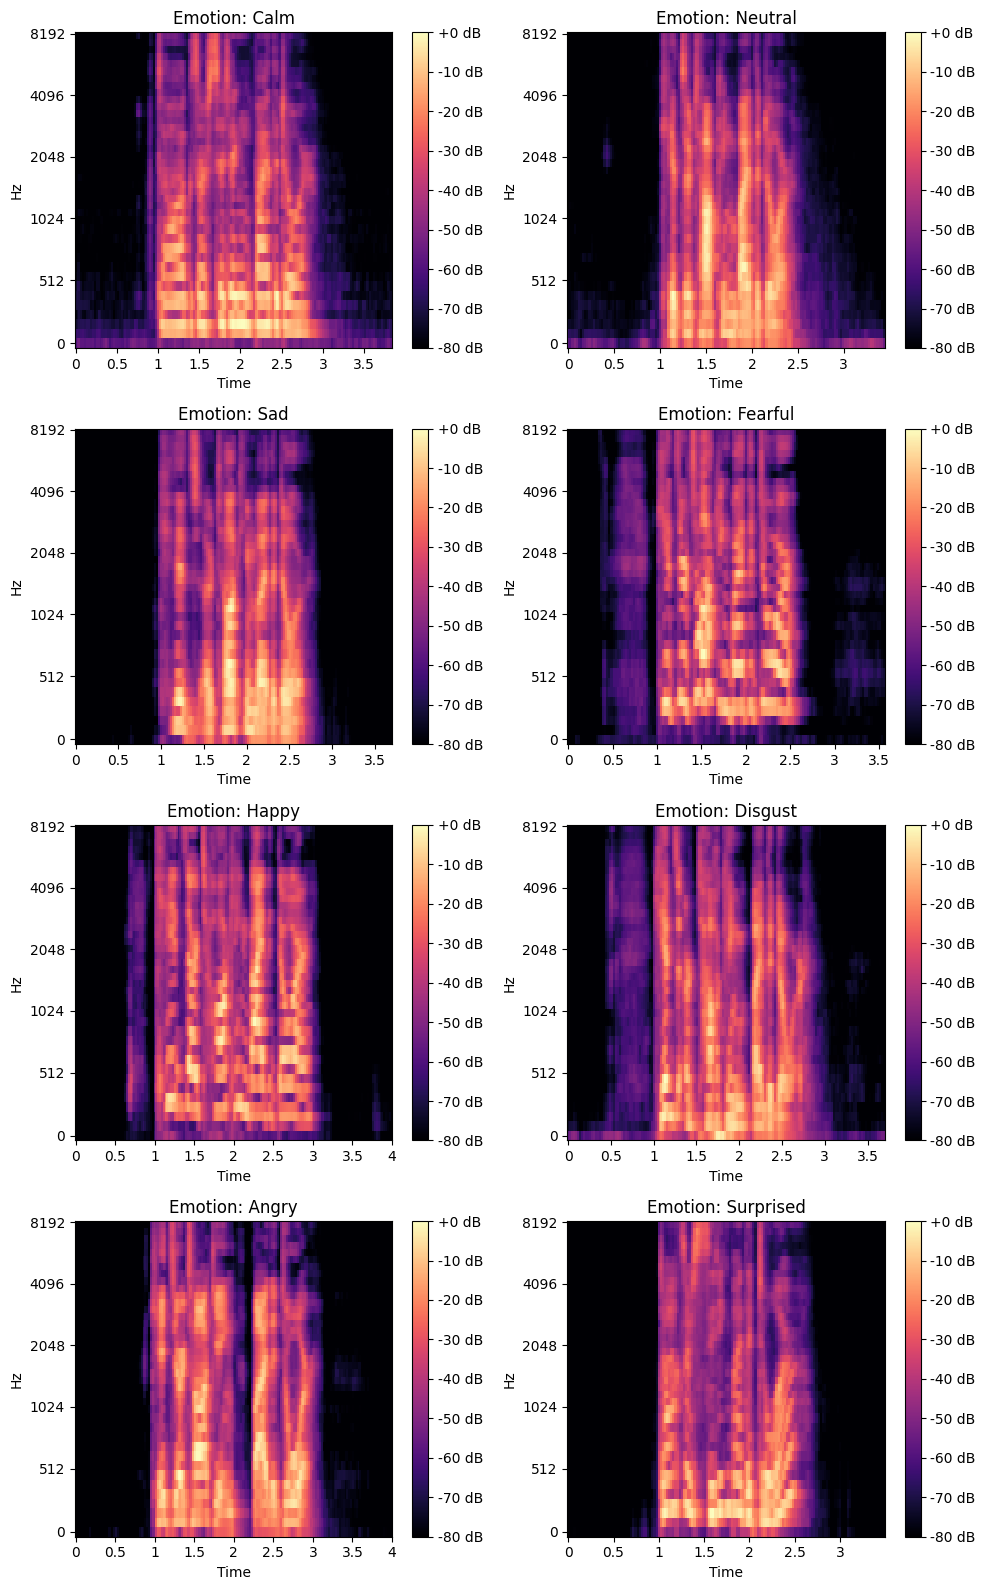

In [22]:
plot_audio_samples(audio_input_df.emotion.unique() , 2)

# Understanding data distribution characteristics

## Peeking at Class balance

In [23]:
audio_input_df.emotion.value_counts()

,count
emotion,
Calm,192
Sad,192
Fearful,192
Happy,192
Angry,192
Disgust,192
Surprised,192
Neutral,96


## Sampling rate distribution

In [24]:
losr = []
for _, row in audio_input_df.iterrows():
  y, sr = librosa.load(row['filename'])
  losr.append(sr)

In [25]:
np.histogram(losr)

(array([   0,    0,    0,    0,    0, 1440,    0,    0,    0,    0]),
 array([22049.5, 22049.6, 22049.7, 22049.8, 22049.9, 22050. , 22050.1,
        22050.2, 22050.3, 22050.4, 22050.5]))

**22050 is the only sample rate that we have. We can use this as a constant for this project**

## Finding the width distribution of mel spectrograms

In [26]:
def mel_width(audio_wav_filename):
  mel = compute_mel(audio_wav_filename)
  return mel.shape[1]

In [27]:
mel_width(audio_input_df.sample(1).iloc[0]['filename'])

147

In [28]:
mel_width_list = audio_input_df['filename'].apply(lambda x: mel_width(x))


In [29]:
mel_width_freq , mel_width_values = np.histogram(mel_width_list)

In [30]:
mel_width_freq.sum()

np.int64(1440)

In [31]:
len(mel_width_list)

1440

In [32]:
mel_width_values

array([127. , 137.1, 147.2, 157.3, 167.4, 177.5, 187.6, 197.7, 207.8,
       217.9, 228. ])

In [33]:
mel_width_freq

array([ 53, 213, 441, 390, 185,  92,  38,  21,   5,   2])

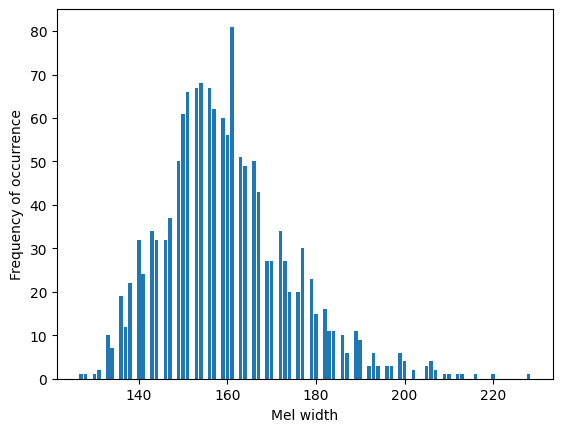

In [34]:
values, counts = np.unique(mel_width_list, return_counts=True)

plt.bar(values, counts)
plt.xlabel("Mel width")
plt.ylabel("Frequency of occurrence")
plt.show()

**Note: The mel width is distributed quite widely. We will need to trim, and then ensure all samples are of the same width so that we can run a CNN on it later**

# Helper function to trim and augment mel spectrograms given an audio file
### The idea is to use this function to create training data set for CNN

In [35]:
def audio_to_augmented_mels(
    audio_file,
    n_mels = 40,
    T = 200,
    n_augments = 50,
    sr = None,
    top_db = 20,
    return_stacked = True
):
    import numpy as np
    import librosa

    # ---------- helpers ----------
    def add_noise(y, factor=0.003):
        return y + factor * np.random.randn(len(y))

    def time_mask(mel, max_width=20):
        mel = mel.copy()
        t = mel.shape[1]
        w = np.random.randint(0, max_width)
        t0 = np.random.randint(0, max(1, t - w))
        mel[:, t0:t0+w] = mel.min()
        return mel

    def freq_mask(mel, max_width=8):
        mel = mel.copy()
        f = mel.shape[0]
        w = np.random.randint(0, max_width)
        f0 = np.random.randint(0, max(1, f - w))
        mel[f0:f0+w, :] = mel.min()
        return mel

    def pad_or_crop(mel):
        t = mel.shape[1]
        if t < T:
            return np.pad(
                mel,
                ((0, 0), (0, T - t)),
                mode="constant",
                constant_values=mel.min()
            )
        start = (t - T) // 2
        return mel[:, start:start + T]

    def compute_mel(y):
        mel = librosa.feature.melspectrogram(
            y=y, sr=sr, n_mels=n_mels, fmax=fmax
        )
        mel_db = librosa.power_to_db(mel, ref=np.max)
        return pad_or_crop(mel_db)

    # ---------- pipeline ----------
    y, sr = librosa.load(audio_file, sr=sr)
    y, _ = librosa.effects.trim(y, top_db=top_db) # Remove leading and trailing silences

    fmax = min(8000, sr / 2)
    mels = []

    # 1️⃣ original (inclusive)
    mels.append(compute_mel(y))

    # 2️⃣ augmented versions
    for _ in range(n_augments - 1):
        y_aug = y.copy()

        if np.random.rand() < 0.5:
            y_aug = add_noise(y_aug)

        if np.random.rand() < 0.5:
            rate = np.random.uniform(0.9, 1.1)
            y_aug = librosa.effects.time_stretch(y_aug, rate = rate)

        if np.random.rand() < 0.5:
            steps = np.random.randint(-2, 3)
            y_aug = librosa.effects.pitch_shift(y_aug, sr = sr, n_steps = steps)

        mel_aug = compute_mel(y_aug)

        # SpecAugment
        if np.random.rand() < 0.5:
            mel_aug = time_mask(mel_aug)
        if np.random.rand() < 0.5:
            mel_aug = freq_mask(mel_aug)

        mels.append(mel_aug)
        # end of for loop

    if return_stacked:
      return np.stack(mels)  # (N, 40, 200)
    else:
      return mels # list of (40, 200)


# Testing effects of augmentation visually

In [36]:
%%time
t_audio_sample_filename = audio_input_df.sample(1).iloc[0]['filename']
t_augmented_mel_list = audio_to_augmented_mels(
    t_audio_sample_filename,
    n_mels = 40,
    T = 200,
    n_augments = 5,
    sr = 22050,
    top_db = 20,
    return_stacked=False
)

CPU times: user 2.64 s, sys: 50.5 ms, total: 2.7 s
Wall time: 5.25 s


## Original spectrogram

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

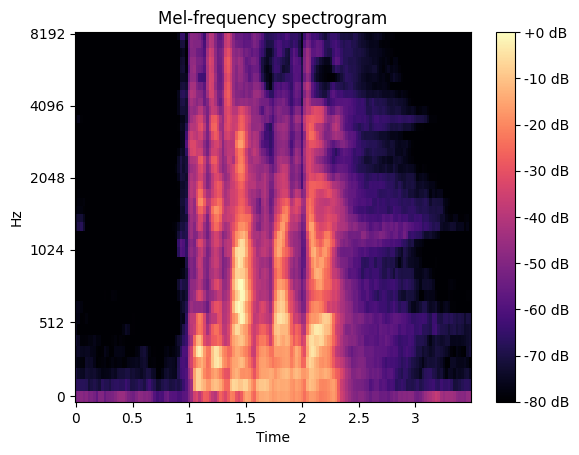

In [37]:
plot_audiofile(t_audio_sample_filename)

## Trimmed, Padded & Augmented spectrograms of the original above

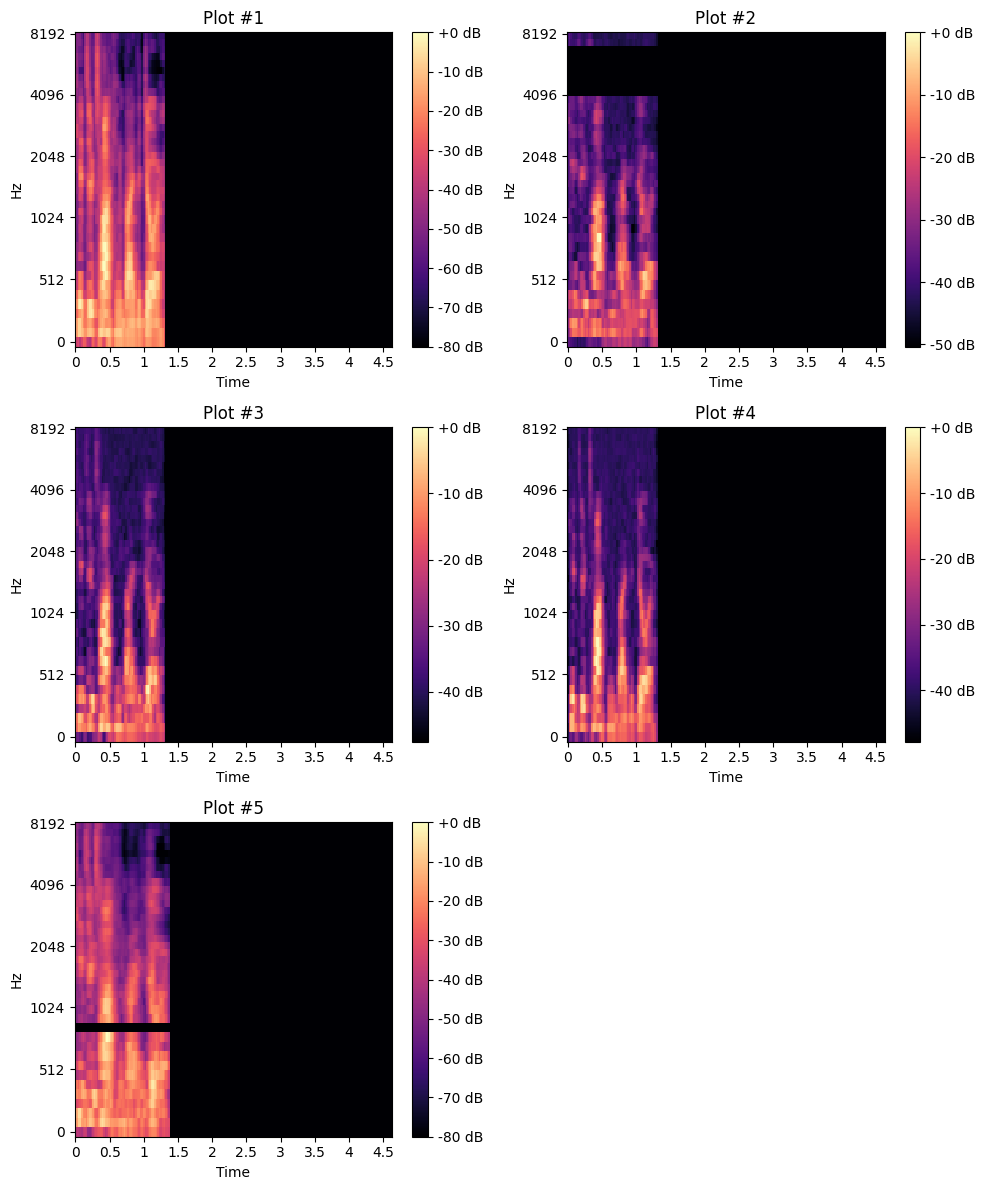

In [38]:
# This is original spectrogram trimmed and padded
plot_mel_spectrograms(t_augmented_mel_list[0:8])


# make_augmented_df() helper function

In [39]:
def make_augmented_df(audio_filename, n_augments, emotion):
  audio_list = audio_to_augmented_mels(
                audio_filename,
                n_augments = n_augments,
                return_stacked = False
              )
  emotion_list = [emotion]*n_augments
  pdf = pd.concat(
          [pd.Series(audio_list),pd.Series(emotion_list)],
          axis = 1
        )
  pdf.columns = ['mel', 'emotion']
  return pdf

# Preparing training data

In [40]:
# training_data_raw = audio_input_df.sample(1).apply(lambda x: make_augmented_df(x['filename'], 10, x['emotion'])
#                               if x['emotion'] == 'Neutral'
#                               else make_augmented_df(x['filename'], 5, x['emotion']) ,
#                             axis = 1)

# training_data_df = pd.concat(training_data_raw.values, ignore_index=True)

In [41]:
%%time
training_data_df = None

for _, row in audio_input_df.iterrows():
  if row['emotion'] == 'Neutral':
    this_df = make_augmented_df(row['filename'], 10, row['emotion'])
  else:
    this_df = make_augmented_df(row['filename'], 5, row['emotion'])

  if training_data_df is None:
    training_data_df = this_df
  else:
    training_data_df = pd.concat([training_data_df, this_df], axis=0, ignore_index=True)

CPU times: user 8min 38s, sys: 2.42 s, total: 8min 40s
Wall time: 5min 28s


In [42]:
training_data_df.shape

(7680, 2)

In [43]:
5*1440 + 96*5

7680

In [44]:
training_data_df.columns

Index(['mel', 'emotion'], dtype='object')

In [45]:
training_data_df.emotion.value_counts()

,count
emotion,
Calm,960
Neutral,960
Sad,960
Fearful,960
Happy,960
Disgust,960
Angry,960
Surprised,960


# CNN model building blocks for speech classification

In [58]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

tf.random.set_seed(42)
np.random.seed(42)


In [71]:
def prepare_xy(df, label_encoder=None):
    X = np.stack(df["mel"].values)            # (N, 40, 200)
    X = X[..., np.newaxis]                    # (N, 40, 200, 1)

    if label_encoder is None:
      label_encoder = LabelEncoder()
      y = label_encoder.fit_transform(df["emotion"])
    else:
      y = label_encoder.transform(df["emotion"])

    return X, y, label_encoder

In [61]:
def build_model(n_convs, lr_schedule, num_classes):
    inputs = tf.keras.Input(shape=(40, 200, 1)) # Assuming 40x200 mel spectrograms
    x = inputs

    filters = [32, 64, 128, 256][:n_convs]

    for i, f in enumerate(filters):
        x = tf.keras.layers.Conv2D(
            f,
            (3,3),
            padding="same",
            kernel_regularizer=tf.keras.regularizers.l2(1e-4)
        )(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation("relu")(x)

        pool = (2,2) if i < 3 else (2,1)
        x = tf.keras.layers.MaxPooling2D(pool)(x)
        x = tf.keras.layers.Dropout(0.25 if i < 3 else 0.3)(x)
        # End For (filters)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [62]:
def get_lr_schedule(name):
    if name == "constant":
        return 1e-3

    if name == "exp_decay":
        return tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=1e-3,
            decay_steps=2000,
            decay_rate=0.9,
            staircase=True
        )

    if name == "cosine":
        return tf.keras.optimizers.schedules.CosineDecay(
            initial_learning_rate=1e-3,
            decay_steps=4000
        )

    raise ValueError("Unknown LR schedule")


In [63]:
def run_cv(df, n_convs_list, lr_schedules, n_splits=5):
    X, y, le = prepare_xy(df)
    num_classes = len(le.classes_)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []

    for n_convs in n_convs_list:
        for lr_name in lr_schedules:
            print(f'run_cv for n_conv : {n_convs}, lr_name: {lr_name}')
            fold_acc = []
            fold_f1  = []
            fold_histories = []

            for train_idx, val_idx in skf.split(X, y):
                X_tr, X_val = X[train_idx], X[val_idx]
                y_tr, y_val = y[train_idx], y[val_idx]

                model = build_model(
                    n_convs=n_convs,
                    lr_schedule=get_lr_schedule(lr_name),
                    num_classes=num_classes
                )

                history = model.fit(
                    X_tr, y_tr,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            patience=10, restore_best_weights=True
                        )
                    ],
                    verbose=0
                )

                preds = model.predict(X_val, verbose=0).argmax(axis=1)
                print(f'----K-fold-CV: Accuracy score {accuracy_score(y_val, preds)}')
                fold_acc.append(accuracy_score(y_val, preds))
                print(f'----K-fold-CV: F1 score macro {f1_score(y_val, preds, average="macro")}')
                fold_f1.append(f1_score(y_val, preds, average="macro"))
                fold_histories.append(history.history)

            results.append({
                "n_convs": n_convs,
                "lr_schedule": lr_name,
                "cv_accuracy": np.mean(fold_acc),
                "cv_macro_f1": np.mean(fold_f1),
                "histories": fold_histories
            })

    return pd.DataFrame(results), le


# Run CV, Select best Hyperparam, Build final model and report accuracy on test!

In [64]:
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(
    training_data_df,
    test_size=0.1,
    stratify=training_data_df["emotion"],
    random_state=42
)


In [66]:
%%time
n_convs_list = [3,4]
lr_schedules = ["constant", "cosine"]

cv_results, label_encoder = run_cv(df, n_convs_list, lr_schedules)

best_hp = cv_results.sort_values("cv_macro_f1", ascending=False).iloc[0]
print(best_hp)

run_cv for n_conv : 3, lr_name: constant
----K-fold-CV: Accuracy score 0.6630513376717281
----K-fold-CV: F1 score macro 0.6586104976037711
----K-fold-CV: Accuracy score 0.36297903109182933
----K-fold-CV: F1 score macro 0.2882335034441249
----K-fold-CV: Accuracy score 0.34949348769898697
----K-fold-CV: F1 score macro 0.2890674492436831
----K-fold-CV: Accuracy score 0.39001447178002896
----K-fold-CV: F1 score macro 0.35045690819879943
----K-fold-CV: Accuracy score 0.2402315484804631
----K-fold-CV: F1 score macro 0.18916663352713675
run_cv for n_conv : 3, lr_name: cosine
----K-fold-CV: Accuracy score 0.5126536514822849
----K-fold-CV: F1 score macro 0.5077159951612406
----K-fold-CV: Accuracy score 0.5213304410701374
----K-fold-CV: F1 score macro 0.5143823261656275
----K-fold-CV: Accuracy score 0.5137481910274964
----K-fold-CV: F1 score macro 0.500977149472045
----K-fold-CV: Accuracy score 0.5332850940665702
----K-fold-CV: F1 score macro 0.5217005544386255
----K-fold-CV: Accuracy score 0.53

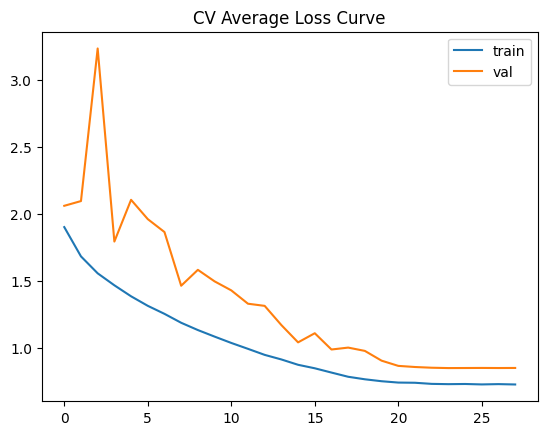

In [69]:
best_hp = cv_results.sort_values("cv_macro_f1", ascending=False).iloc[0]
histories = best_hp["histories"]

import numpy as np
import matplotlib.pyplot as plt

min_len = min(len(h["loss"]) for h in histories)
avg_train_loss = np.mean([h["loss"][:min_len] for h in histories], axis=0)

min_len = min(len(h["val_loss"]) for h in histories)
avg_val_loss   = np.mean([h["val_loss"][:min_len] for h in histories], axis=0)

plt.plot(avg_train_loss, label="train")
plt.plot(avg_val_loss, label="val")
plt.title("CV Average Loss Curve")
plt.legend()
plt.show()

In [72]:
X_train, y_train, _ = prepare_xy(df, label_encoder)
X_test, y_test, _ = prepare_xy(df_test, label_encoder)

print(f"Building final model with best HP: Conv layers = {best_hp['n_convs']} and lr_schedule as {best_hp['lr_schedule']}")

final_model = build_model(
    n_convs=int(best_hp["n_convs"]),
    lr_schedule=get_lr_schedule(best_hp["lr_schedule"]),
    num_classes=len(label_encoder.classes_)
)

final_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=12, restore_best_weights=True
        )
    ],
    verbose=1
)


Building final model with best HP: Conv layers = 4 and lr_schedule as cosine
Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2513 - loss: 1.9737
Epoch 2/100
  9/216 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3999 - loss: 1.6378

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3914 - loss: 1.6338
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4601 - loss: 1.4826
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5007 - loss: 1.3747
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5385 - loss: 1.2760
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5707 - loss: 1.2084
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6076 - loss: 1.1247
Epoch 8/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6281 - loss: 1.0614
Epoch 9/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6395 - loss: 1.0318
Epoch 10/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6699 - loss: 0.9622
Epoch 11/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6929 - loss: 0.9085
Epoch 12/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7039 - loss: 0.8653
Epoch 13/100
216/216 ━━━━━━━━━━━━━━━━━━━━

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

test_preds = final_model.predict(X_test).argmax(axis=1)

test_accuracy = accuracy_score(y_test, test_preds)
print("Test accuracy:", test_accuracy)

test_macro_f1 = f1_score(y_test, test_preds, average="macro")
print("Test Macro-F1:", test_macro_f1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Test accuracy: 0.7369791666666666
Test Macro-F1: 0.7396567959889699


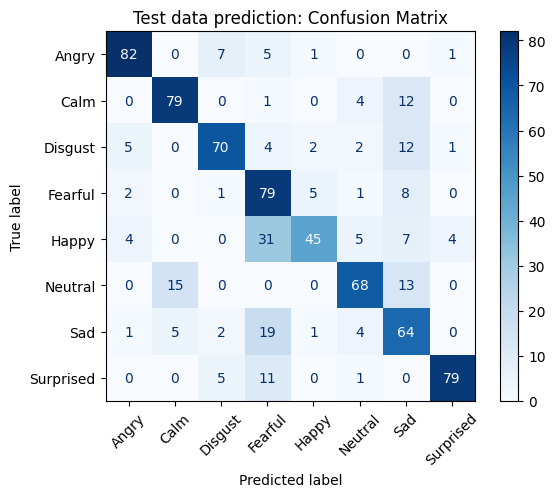

In [79]:
cm = confusion_matrix(y_test, test_preds)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_encoder.classes_
)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Test data prediction: Confusion Matrix")
plt.show()

In [75]:
from google.colab import files
final_model.save_weights("emotion_cnn.weights.h5")
files.download("emotion_cnn.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
final_model.save("emotion_cnn_full_model.keras")
files.download("emotion_cnn_full_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
np.save("classes.npy", label_encoder.classes_)
files.download('classes.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>